# INST728E - Module 10. Graph and Network Modeling

Information flows and social networks are important considerations during crises, when people are trying to get updates on safe spaces, loved ones, places of shelter, etc.
Twitter is noisy though, and a lot of the data may be irrelevant, condolences/thoughts expressed by celebrities, or otherwise uninformative.
Using network analysis, we can get some idea about who the most important Twitter users were during this time, and how people split into groups online.

For this analysis, we'll use the NetworkX package to construct a social graph of how people interact. Each person in our Twitter data will be a node in our graph, and edges in the graph will represent mentions during this timeframe.
Then we will explore a few simple analytical methods in network analysis, including:

- Central accounts
- Visualization

In [1]:
%matplotlib inline

import datetime
import json
import string
import os

import numpy as np

# For plotting
import matplotlib.pyplot as plt

# Network analysis
import networkx as nx

import nltk # Used for FreqDist

## Event Description

In [2]:
crisisInfo = {
    "Women's March": {
        "name": "Women's March 2017",
        "time": 1484992800, # 21 January 2017, 6:58 UTC to 08:11 UTC
        "directory": "womensmarch",    # Where do we find the relevant files
        "keywords": [    # How can we describe this event?
            "women's march","resist", "notmypresident","inauguration","women's right","human right","planned parenthood"
        ],
        "place": [
            38.899539,# Latitude
            -77.036551 # Longitude
        ],
        "box": {    # Where did this event occur?
            "lowerLeftLon": -77.119759,
            "lowerLeftLat": 38.791645,
            "upperRightLon": -76.909393,
            "upperRightLat": 38.995548,
        }
    },
}

In [3]:
# Replace the name below with your selected crisis
selectedCrisis = "Women's March"


<hr>

## Reading Relevant Tweets

Re-read our relevant tweets...

In [4]:
in_file_path = "/Users/yutingliao/Desktop/INST728 E/relevant_tweet_output_keywords_updated.json" # Replace this as necessary

relevant_tweets = []
with open(in_file_path, "r") as in_file:
    for line in in_file:
        relevant_tweets.append(json.loads(line.encode("utf8")))
        
print("Relevant Tweets:", len(relevant_tweets))

Relevant Tweets: 4447


### Graph Building

To limit the amount of data we're looking at, we'll only build the network for people who tweeted about a relevant keyword and the people they mention. 
We build this network simply by iterating through all the tweets in our relevant list and extract the "user_mentions" list from the "entities" section of the tweet object.
For each mention a user makes, we will add an edge from that user to the user he/she mentioned.

In [5]:
# We'll use a directed graph since mentions/retweets are directional
graph = nx.DiGraph()
    
for tweet in relevant_tweets:
    userName = tweet["user"]["screen_name"].lower()
    graph.add_node(userName)

    mentionList = tweet["entities"]["user_mentions"]

    for otherUser in mentionList:
        otherUserName = otherUser["screen_name"].lower()
        if ( graph.has_node(otherUserName) == False ):
            graph.add_node(otherUserName)
            
        if ( graph.has_edge(userName, otherUserName)):
            graph[userName][otherUserName]["weight"] += 1
        else:
            graph.add_edge(userName, otherUserName, weight=1)
        
print ("Number of Users:", len(graph.node))

Number of Users: 6553


In [6]:
for edge in graph.edges():
    if ( graph[edge[0]][edge[1]]["weight"] > 1 ):
        print(edge, graph[edge[0]][edge[1]])

('flajeffreyt', 'politicususa') {'weight': 2}
('cabpuppy', 'monitor_sur') {'weight': 2}
('darren_nicholls', 'politicususa') {'weight': 2}
('csluna1ruby', 'nytimes') {'weight': 2}
('camillendavis1', 'abc') {'weight': 2}
('hothbunny', 'dlongenecker1') {'weight': 2}
('tyjw_', '__girlsgonewild') {'weight': 2}
('kathleenallonas', 'steemit') {'weight': 2}
('nobu4612', 'vesparesistance') {'weight': 2}
('maestrosenresi1', 'maestrosenresi1') {'weight': 2}
('punkmemequeen', 'womensmarch') {'weight': 2}
('jetisonneus', 'correctthemedia') {'weight': 2}
('moniquevernon1', 'politicususa') {'weight': 2}
('law_rich', 'hratsea') {'weight': 2}


### Central Users

In network analysis, "centrality" is used to measure the importance of a given node. 
Many different types of centrality are used to describe various types of importance though.
Examples include "closeness centrality," which measures how close a node is to all other nodes in the network, versus "betweeness centrality," which measures how many shortest paths run through the given node.
Nodes with high closeness centrality are important for rapidly disseminating information or spreading disease, whereas nodes with high betweeness are more important to ensure the network stays connected.

The PageRank is another algorithm for measuring importance and was proposed by Sergey Brin and Larry Page for the early version of Google's search algorithm.
NetworkX has an implementation of the PageRank algorithm that we can use to look at the most important/authoritative users on Twitter based on their connections to other users.

In [7]:
# Now we prune for performance reasons
# remove all nodes with few edges

for i in range(5):
    nodeList = [n for n,d in graph.degree() if d<2]
    
    if ( len(nodeList) == 0 ):
        break
    
    print("Nodes to Delete:", len(nodeList))
    
    graph.remove_nodes_from(nodeList)
    print ("Number of Remaining Users:", len(graph.node))

Nodes to Delete: 5571
Number of Remaining Users: 982
Nodes to Delete: 632
Number of Remaining Users: 350
Nodes to Delete: 49
Number of Remaining Users: 301
Nodes to Delete: 14
Number of Remaining Users: 287
Nodes to Delete: 9
Number of Remaining Users: 278


In [8]:
# THis may take a while
pageRankList = nx.pagerank_numpy(graph)

In [9]:
highRankNodes = sorted(pageRankList.keys(), key=pageRankList.get, reverse=True)
for x in highRankNodes[:20]:
    print (x, pageRankList[x])
    

realdonaldtrump 0.02948204690346755
potus 0.02009361881133892
kristynwongtam 0.011523222257398661
biblewpnetwork 0.011523222257398628
vnuek 0.011523222257398567
amalmorsy3 0.011523222257398564
smilesaga 0.011523222257398555
rainpanda 0.011523222257398536
ledjefflin 0.011523222257398524
lisaga 0.011523222257398524
iphr 0.01152322225739845
loveselenator__ 0.011523222257398422
zero_gov 0.011523222257398416
scottishbking 0.011523222257398403
macdaddy611 0.011523222257398368
tonytodd54 0.011523222257398368
weavinghouse 0.01152322225739834
randwilson99 0.011523222257398302
yalyde 0.011523222257398276
frodofied 0.01152322225739827


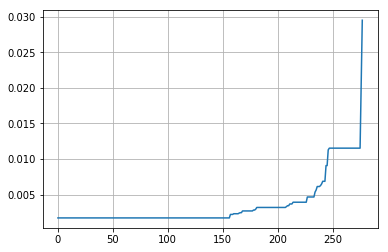

In [10]:
#plt.hist([x for x in pageRankList.values()])
plt.plot(range(len(pageRankList)), sorted([x for x in pageRankList.values()]))

plt.grid()
plt.show()

## Visualize the Graph

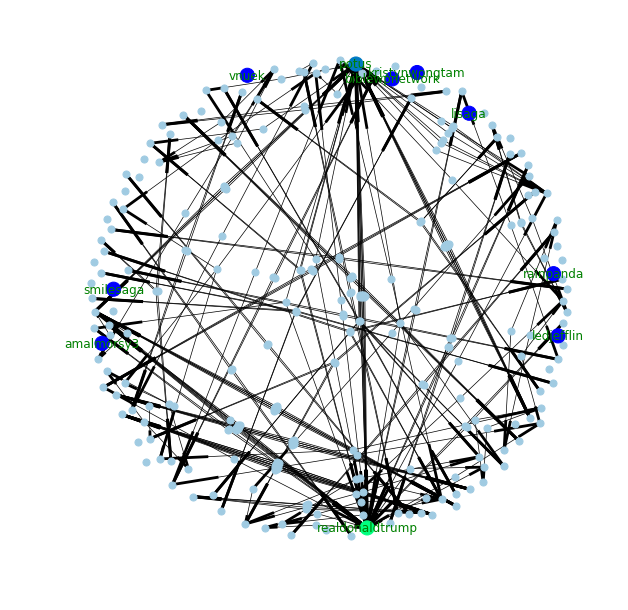

In [15]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(graph, scale=200, iterations=100, k=0.2)
#pos = nx.fruchterman_reingold_layout(graph, weight="weight", iterations=100)
# pos = nx.random_layout(graph)
nx.draw(graph, 
        pos, 
        node_color='#A0CBE2', 
        width=0.7, 
        with_labels=False,
        node_size=50)

# Get the highest ranking nodes...
hrNames = highRankNodes[:10]

# Get a list of scores for these high-ranked nodes
scores = pageRankList.values()
min_val = min(scores)
max_val = max(scores)
hrValues = [((pageRankList[x]-min_val) / max_val) for x in hrNames]

# Draw our high-rank nodes with a larger size and different color
nx.draw_networkx_nodes(graph, pos, nodelist=hrNames,
                       node_size=200,
                       node_color=hrValues,
                       cmap=plt.cm.winter)

# Dummy dictionary that maps usernames to themselves
#  (we'll use this to set node labels)
hrDict = dict(zip(hrNames, hrNames))

# Add labels, so we can see them
nx.draw_networkx_labels(graph,
                        pos,
                        labels=hrDict,
                        fontsize=36,
                        font_color="g")

plt.axis('off')
plt.show()

## Community Analysis

While the graph above shows many connections among these users, we can evaluate the graph's __density__ to determine how many of the possible edges exist in this graph. This metric also gives some insight into how tightly connected these users are.

From there, we can also look at subgroups of users, or communities. These communities are groups of users that are more interconnected with each other than others in the network and may show us groups of news organizations versus regular users or users who tweet in the same language.

NetworkX has built-in support for community analysis, and as with centrality, many methods exist for evaluating this metric.

In [16]:
from networkx.algorithms import community # Community analysis functions

In [17]:
# Use Girvan-Newman algorithm to find top-level community structure
community_iter = community.girvan_newman(graph)

# The first set of communities is the top level. Subsequent elements
#  in this iterator describe subgroups within communities. We'll 
#  only use level 1 for now.
top_level_comms = next(community_iter)

Community: 1
	User Count: 19
	Top Users:
	 nytimes 0.12885273972602743
	 un_women 0.12157534246575342
	 presssec 0.07791095890410962
	 abcpolitics 0.07063356164383568
	 msnbc 0.0706335616438355
	Frequent Hashtags:
	 notmypresident 2
	 resist 1
	 supportfreepress 1
	 resisttrump 1
	 nevertrump 1


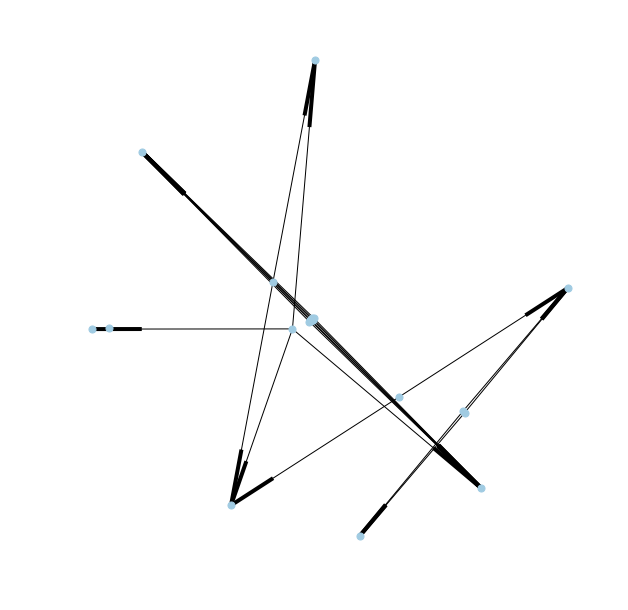

Community: 2
	User Count: 140
	Top Users:
	 realdonaldtrump 0.07476098309901764
	 potus 0.05181438452311223
	 foxnews 0.029082912603295125
	 aynrandpaulryan 0.01771717664338672
	 laurenjauregui 0.017717176643386696
	Frequent Hashtags:
	 womensmarch 20
	 theresistance 19
	 resistance 10
	 notmypresident 5
	 resisttrump 3
	 resist 3
	 inauguration 3
	 notmypresidenttrump 3
	 whyimarch 3
	 9news 2


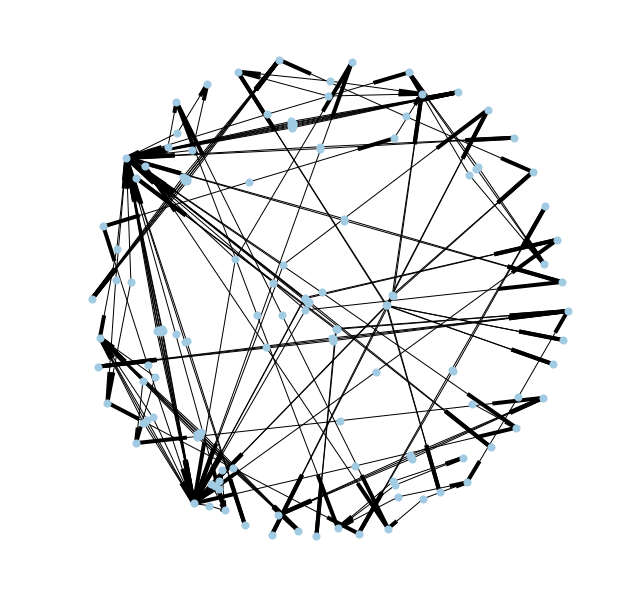

Community: 10
	User Count: 12
	Top Users:
	 mydaughtersarmy 0.2560975609756096
	 kerrygfleming 0.2560975609756096
	 kakabouie 0.048780487804878064
	 clg0519 0.048780487804878064
	 studiovavoom 0.048780487804878064
	Frequent Hashtags:
	 womensmarch 10


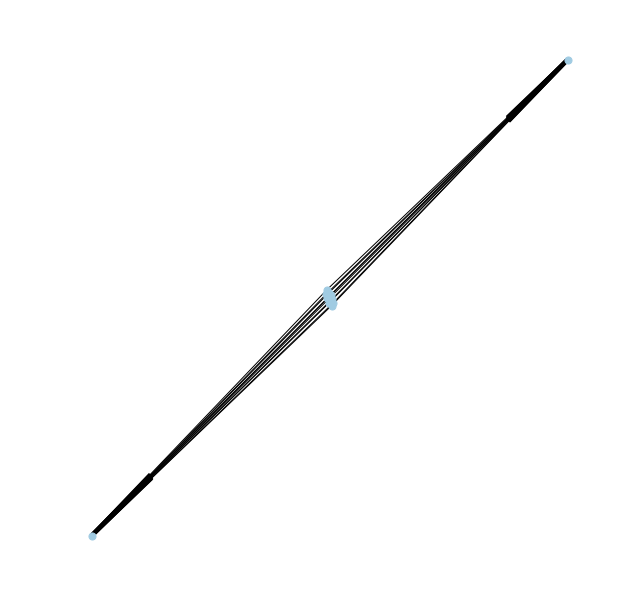

In [18]:
def draw_graph(graph):
    """
    Function for drawing a given graph using the spring layout
    algorithm.
    """
    
    plt.figure(figsize=(8,8))
    pos = nx.spring_layout(graph, scale=200, iterations=100, k=0.2)
    # pos = nx.fruchterman_reingold_layout(graph, weight="weight", iterations=100)
    # pos = nx.random_layout(graph)
    nx.draw(subg, 
            pos, 
            node_color='#A0CBE2', 
            width=1, 
            with_labels=False,
            node_size=50)

    plt.axis('off')
    plt.show()
    
    
def find_auth_nodes(graph, limit=5):
    """
    Given a NetworkX Graph structure, use PageRank to find the most
    authoritative nodes in the graph.
    """
    
    # THis may take a while
    local_pg_rank = nx.pagerank_numpy(graph)
    
    # Rank the users by their PageRank score, and reverse the list
    #  so we can get the top users in the front of the list
    local_auths = sorted(local_pg_rank.keys(), key=local_pg_rank.get, reverse=True)
    
    # Take only the first few users
    local_targets = local_auths[:limit]

    # Print user name and PageRank score
    print("\tTop Users:")
    for x in local_targets:
        print ("\t", x, local_pg_rank[x])
        
    # In case we want to use these usernames later
    return local_targets

def user_hashtags(user_list, tweet_list, limit=5):
    """
    Simple function that finds all tweets by a given set of users,
    and prints the top few most frequent hashtags
    """
    
    # Keep only tweets authored by someone in our user set
    target_tweets = filter(
        lambda tweet: tweet["user"]["screen_name"].lower() in user_list, tweet_list)
    
    # This list comprehension iterates through the tweet_list list, and for each
    #  tweet, it iterates through the hashtags list
    htags = [
            hashtag["text"].lower() 
             for tweet in target_tweets 
                 for hashtag in tweet["entities"]["hashtags"]
            ]

    htags_freq = nltk.FreqDist(htags)

    print("\tFrequent Hashtags:")
    for tag, count in htags_freq.most_common(limit):
        print("\t", tag, count)

# Iterate through the communities and trim ones of smallish size
for i, comm in enumerate(top_level_comms):
    
    # We'll skip small communities
    if ( len(comm) < 10 ):
        continue
        
    print("Community: %d" % (i+1))
    print("\tUser Count: %d" % len(comm))
    
    # Use the username set produced by our community generator to 
    #  create a subgraph of only these users and the connections
    #  between them.
    subg = graph.subgraph(comm)
    
    # Given the subgraph...
    #  find the most authoritative nodes,
    find_auth_nodes(subg)
    
    #  the most frequent hashtags, and
    user_hashtags(comm, relevant_tweets, limit=10)
    
    #  then visualize the network
    draw_graph(subg)

